In [1]:
##Importing the packages
#Data processing packages
import numpy as np 
import pandas as pd 
from pandas.api.types import is_numeric_dtype, is_object_dtype, is_string_dtype

#Visualization packages
import matplotlib.pyplot as plt 
import seaborn as sns 

#Machine Learning packages
from sklearn.svm import SVC, NuSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis, LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

#Suppress warnings
import warnings
warnings.filterwarnings('ignore')

import pickle

In [2]:
#Import Employee Attrition data
data=pd.read_csv('customerdata.csv')
pd.set_option('display.max_columns', data.shape[1])

In [3]:
data.head()

,city,age,gender,price,color,category
0,Mumbai,20,F,500,1,1
1,Thane,44,M,750,1,2
2,Dadar,25,F,300,3,3
3,Mumbai,55,F,450,4,3
4,Thane,60,M,200,3,1


In [4]:
data.columns

Index(['city', 'age', 'gender', 'price', 'color', 'category'], dtype='object')

In [5]:
data.drop(columns=['gender', 'age'], inplace=True)

In [6]:
data.describe()

,price,color,category
count,999.000000,999.000000,999.000000
mean,466.816817,2.997998,2.006006
std,181.930412,1.383410,0.830267
min,200.000000,1.000000,1.000000
25%,300.000000,2.000000,1.000000
50%,500.000000,3.000000,2.000000
75%,600.000000,4.000000,3.000000
max,750.000000,5.000000,3.000000


In [7]:
# for index, element in enumerate(data['age']):
#     if(element<30):
#         data.at[index, 'age'] = 1
#     elif(element>=30 and element<40):
#         data.at[index, 'age'] = 2
#     elif(element>=40 and element<50):
#         data.at[index, 'age'] = 3
#     elif(element>=50 and element<60):
#         data.at[index, 'age'] = 4

In [8]:
predicted_column = input("Enter the column to be predicted: ")
predicted_column = ''.join(predicted_column.strip().split())
predicted_column

Enter the column to be predicted: city


'city'

In [9]:
data.describe(include='all')

,city,price,color,category
count,999,999.000000,999.000000,999.000000
unique,3,NaN,NaN,NaN
top,Dadar,NaN,NaN,NaN
freq,333,NaN,NaN,NaN
mean,NaN,466.816817,2.997998,2.006006
std,NaN,181.930412,1.383410,0.830267
min,NaN,200.000000,1.000000,1.000000
25%,NaN,300.000000,2.000000,1.000000
50%,NaN,500.000000,3.000000,2.000000
75%,NaN,600.000000,4.000000,3.000000


In [10]:
# is_string_dtype(data['city'])

In [11]:
#These fields does not add value, hence removed
dropped_cols = []
for col in data.columns:
    if(is_string_dtype(data[col])):
        if(len(data[col].unique())==1):
            dropped_cols.append(col)
    elif(is_numeric_dtype(data[col])):
        if(data[col].std(axis=0)==0.0):
            dropped_cols.append(col)
print("Non-value-adding Columns:", dropped_cols)

Non-value-adding Columns: []


In [12]:
# data.drop(columns=dropped_cols, inplace=True)

In [13]:
is_object_dtype(data[predicted_column])

True

In [14]:
one_hot_cols = []
label_enc_cols = []
for col in data.columns:
    if(is_string_dtype(data[col]) or is_object_dtype(data[col])):
        if(len(data[col].unique())>2 and col != predicted_column):
            one_hot_cols.append(col)
        label_enc_cols.append(col)
        label_enc = LabelEncoder()
        data[col] = label_enc.fit_transform(data[col])
        pickle.dump(label_enc, open(col+'_label_enc.encoder', 'wb'))
print(one_hot_cols)
print(label_enc_cols)

[]
['city']


In [15]:
data.head()

,city,price,color,category
0,1,500,1,1
1,2,750,1,2
2,0,300,3,3
3,1,450,4,3
4,2,200,3,1


In [16]:
# A lambda function is a small anonymous function.
# A lambda function can take any number of arguments, but can only have one expression.
# data[predicted_column]=data[predicted_column].apply(lambda x : 1 if x=='Yes' else 0)

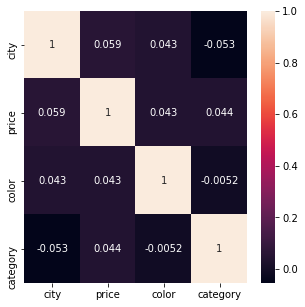

In [17]:
plt.figure(figsize=(5,5))
sns.heatmap(data.corr(), annot=True)

In [18]:
data.drop(predicted_column, axis=1).apply(lambda x: round(x.corr(data[predicted_column])*100, 2))

price       5.90
color       4.26
category   -5.32
dtype: float64

### **Separating the Feature and Target Matrices**

In [19]:
X = data.drop(columns=[predicted_column])
y = data[predicted_column]

In [20]:
y.name == predicted_column

True

### **Convert Categorical values to Numeric Values**

In [21]:
#This function is used to convert Categorical values to Numerical values
# drop_first_col = False
# X = pd.get_dummies(X, columns=one_hot_cols, drop_first=drop_first_col)
### pickle.dump(X.columns, open('train_data.columns', 'wb'))
### testData.reindex(columns = pickle.load(open('train_data.columns', 'rb')), fill_value = 0)

In [22]:
X.head()

,price,color,category
0,500,1,1
1,750,1,2
2,300,3,3
3,450,4,3
4,200,3,1


**COMMENT:** It can be seen from the difference in the output of **data.head()** before and after the coversion that now **ALL the fields have numerical values.**

### **Scaling the data values to standardize the range of independent variables**

In [23]:
#Feature scaling is a method used to standardize the range of independent variables or features of data.
#Since the range of values of raw data varies widely, in some machine learning algorithms, objective functions will not work properly without normalization. 
scaler_X = StandardScaler()
X = scaler_X.fit_transform(X)
pickle.dump(scaler_X, open('scaler_X.scaler', 'wb'))

### **Split the data into Training set and Testing set**

In [24]:
# Split the data into Training set and Testing set
X_train, X_test, y_train, y_test = train_test_split(X, y.values, test_size=0.2, random_state=42)

### **Function definition**

In [25]:
#Function to Train and Test Machine Learning Model
def train_test_ml_model(X_train,y_train,X_test,Model):
    global model
#     model = CalibratedClassifierCV(model)
    model.fit(X_train, y_train) #Train the Model
    y_pred = model.predict(X_test) #Use the Model for prediction

    # Test the Model
    from sklearn.metrics import confusion_matrix
    cm = confusion_matrix(y_test,y_pred)

    #Plot/Display the results
    # cm_plot(cm,Model)
    print('Accuracy of the Model' , Model, str(round(100*model.score(X_test, y_test),2))+'%')
    print('Precision of the Model' , Model, str(round(100*precision_score(y_test, y_pred, average='weighted'),2))+'%')
    print('Recall of the Model' , Model, str(round(100*recall_score(y_test, y_pred, average='weighted'), 2))+'%')
    print('F1 Score of the Model' , Model, str(round(100*f1_score(y_test, y_pred, average='weighted'), 2))+'%')

In [26]:
#Function to plot Confusion Matrix
def cm_plot(cm,Model):
    plt.clf()
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
    classNames = np.flip(y.unique())
    plt.title('Comparison of Prediction Result for '+ Model)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    tick_marks = np.arange(len(classNames))
    plt.xticks(tick_marks, classNames, rotation=45)
    plt.yticks(tick_marks, classNames)
    s = [['TN','FP'], ['FN', 'TP']]
    for i in range(2):
        for j in range(2):
            plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
    plt.show()

### **PERFORM PREDICTIONS USING MACHINE LEARNING ALGORITHMS**

In [27]:
from sklearn.svm import SVC  #Import packages related to Model
from sklearn.calibration import CalibratedClassifierCV
Model = "SVC"
model=CalibratedClassifierCV(SVC()) #Create the Model
model.fit(X_train, y_train)
# train_test_ml_model(X_train, y_train, X_test, Model)
pickle.dump(model, open('CalibratedSVC_age.model', 'wb'))

In [28]:
from sklearn.svm import NuSVC  #Import packages related to Model
Model = "NuSVC"
model=NuSVC(nu=0.285)#Create the Model

train_test_ml_model(X_train,y_train,X_test,Model)

Accuracy of the Model NuSVC 100.0%
Precision of the Model NuSVC 100.0%
Recall of the Model NuSVC 100.0%
F1 Score of the Model NuSVC 100.0%


In [29]:
# from xgboost import XGBClassifier  #Import packages related to Model
# Model = "XGBClassifier()"
# model=XGBClassifier() #Create the Model

# train_test_ml_model(X_train,y_train,X_test,Model)

In [30]:
from sklearn.neighbors import KNeighborsClassifier  #Import packages related to Model
Model = "KNeighborsClassifier"
model=KNeighborsClassifier(n_neighbors=7)

# train_test_ml_model(X_train,y_train,X_test,Model)

model2 = CalibratedClassifierCV(KNeighborsClassifier(n_neighbors=7))
model2.fit(X_train, y_train)
print(model2.score(X_test, y_test))
pickle.dump(model2, open('CalibratedKNN.model', 'wb'))

0.96


In [31]:
from sklearn.naive_bayes import GaussianNB  #Import packages related to Model
Model = "GaussianNB"
model=GaussianNB()

train_test_ml_model(X_train,y_train,X_test,Model)

Accuracy of the Model GaussianNB 94.5%
Precision of the Model GaussianNB 94.56%
Recall of the Model GaussianNB 94.5%
F1 Score of the Model GaussianNB 94.5%


In [ ]:
from sklearn.linear_model import SGDClassifier #Import packages related to Model
Model = "SGDClassifier"
model=SGDClassifier()

train_test_ml_model(X_train,y_train,X_test,Model)

In [ ]:
from sklearn.linear_model import LogisticRegression #Import packages related to Model
Model = "LogisticRegression"
model=LogisticRegression()

train_test_ml_model(X_train,y_train,X_test,Model)

In [ ]:
from sklearn.tree import DecisionTreeClassifier #Import packages related to Model
Model = "DecisionTreeClassifier"
model=DecisionTreeClassifier()

train_test_ml_model(X_train,y_train,X_test,Model)

In [ ]:
from sklearn.tree import ExtraTreeClassifier #Import packages related to Model
Model = "ExtraTreeClassifier"
model=ExtraTreeClassifier()

train_test_ml_model(X_train,y_train,X_test,Model)

In [ ]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis #Import packages related to Model
Model = "QuadraticDiscriminantAnalysis"
model = QuadraticDiscriminantAnalysis()

train_test_ml_model(X_train,y_train,X_test,Model)

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis #Import packages related to Model
Model = "LinearDiscriminantAnalysis"
model=LinearDiscriminantAnalysis()

train_test_ml_model(X_train,y_train,X_test,Model)

In [ ]:
from sklearn.ensemble import RandomForestClassifier #Import packages related to Model
Model = "RandomForestClassifier"
model=RandomForestClassifier()

train_test_ml_model(X_train,y_train,X_test,Model)

In [ ]:
from sklearn.ensemble import AdaBoostClassifier #Import packages related to Model
Model = "AdaBoostClassifier"
model=AdaBoostClassifier()

train_test_ml_model(X_train,y_train,X_test,Model)

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier #Import packages related to Model
Model = "GradientBoostingClassifier"
model=GradientBoostingClassifier()

train_test_ml_model(X_train,y_train,X_test,Model)